In [179]:
# %pip install yfinance
# %pip install matplotlib

import yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [180]:
Ticker = input("Enter Ticker: ")
df = yfinance.download(Ticker, period="1y")
df.head()

/var/folders/xm/pjfr6m5d7b3bfhc_bfrghpwh0000gn/T/ipykernel_53618/313345706.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yfinance.download(Ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-10-21,218.850006,220.479996,215.729996,218.899994,47329000
2024-10-22,217.970001,218.220001,215.259995,217.309998,43268700
2024-10-23,213.649994,218.720001,212.110001,217.130005,80938900
2024-10-24,260.480011,262.119995,242.649994,244.679993,204491900
2024-10-25,269.190002,269.489990,255.320007,256.010010,161611900


In [181]:
def calc_growth_rate(df):
    df["Return"] = (df['Close'] / df['Close'].shift(1)).apply(lambda x: np.log(x))
    return df["Return"].mean()




In [182]:
growth_rate = calc_growth_rate(df)
std = df["Return"].std()
dt = 1/252
output = []

In [183]:
output = np.zeros((10000, 200))
for i in range(10000):
    Stock_Price = df['Close'].iloc[-1]
    for j in range(200):
        Z = np.random.normal()
        Stock_Price = Stock_Price * np.exp((growth_rate - 0.5 * std**2) * dt + std * np.sqrt(dt) * Z)
        output[i, j] = Stock_Price

/var/folders/xm/pjfr6m5d7b3bfhc_bfrghpwh0000gn/T/ipykernel_53618/786672046.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  output[i, j] = Stock_Price


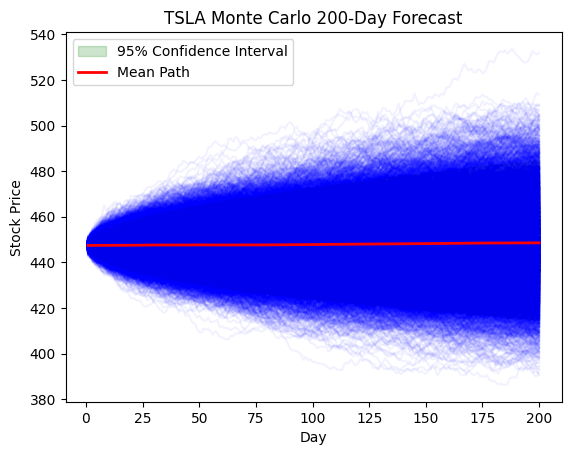

In [193]:
time = np.arange(1, 201)

# 1️⃣ Confidence interval first (background)
p_lower = np.percentile(output, 2.5, axis=0)
p_upper = np.percentile(output, 97.5, axis=0)
plt.fill_between(time, p_lower, p_upper, color='green', alpha=0.2, label='95% Confidence Interval')

# 2️⃣ Plot all paths (semi-transparent)
for path in output:
    plt.plot(time, path, color='blue', alpha=0.05)

# 3️⃣ Mean path on top
mean_path = output.mean(axis=0)
plt.plot(time, mean_path, color='red', linewidth=2, label='Mean Path')

plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.title(f"{Ticker} Monte Carlo 200-Day Forecast")
plt.legend()
plt.show()

In [185]:
min_val = output.min()
max_val = output.max()
print("Min:", min_val, "Max:", max_val)

Min: 386.25930343251065 Max: 533.604115489424
